In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv(r"E:\Bunny\Python\Reviews1.csv")
dataset.head()


,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [3]:
dataset.isnull().any()

asin            False
name             True
rating          False
date            False
verified        False
title            True
body             True
helpfulVotes     True
dtype: bool

In [4]:
dataset["title"].fillna(dataset["title"].mode()[0],inplace=True)
dataset["body"].fillna(dataset["body"].mode()[0],inplace=True)
dataset["helpfulVotes"].fillna(dataset["helpfulVotes"].mean(),inplace=True)
dataset["name"].fillna(dataset["name"].mode()[0],inplace=True)

In [5]:
data=dataset.drop(["asin","name","rating","date","body","helpfulVotes"],axis=1)

In [6]:
data

,verified,title
0,False,"Def not best, but not worst"
1,False,Text Messaging Doesn't Work
2,False,Love This Phone
3,False,"Love the Phone, BUT...!"
4,False,"Great phone service and options, lousy case!"
...,...,...
67981,False,"Awesome Phone, but finger scanner is a big mis..."
67982,False,Simply Amazing!
67983,False,"great phon3, but many bugs need to fix. still ..."
67984,True,Phone is like new


In [7]:
sampledata=data[0:5000]

In [8]:
sampledata

,verified,title
0,False,"Def not best, but not worst"
1,False,Text Messaging Doesn't Work
2,False,Love This Phone
3,False,"Love the Phone, BUT...!"
4,False,"Great phone service and options, lousy case!"
...,...,...
4995,True,Five Stars
4996,True,Five Stars
4997,True,Five Stars
4998,True,great phone


In [9]:
sampledata["verified"].value_counts()

True     3846
False    1154
Name: verified, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
sampledata["verified"]=le.fit_transform(sampledata["verified"])


C:\Users\rohit\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
sampledata

,verified,title
0,0,"Def not best, but not worst"
1,0,Text Messaging Doesn't Work
2,0,Love This Phone
3,0,"Love the Phone, BUT...!"
4,0,"Great phone service and options, lousy case!"
...,...,...
4995,1,Five Stars
4996,1,Five Stars
4997,1,Five Stars
4998,1,great phone


In [12]:
dataset.corr()#correlation


,rating,verified,helpfulVotes
rating,1.000000,0.105801,-0.025947
verified,0.105801,1.000000,-0.020351
helpfulVotes,-0.025947,-0.020351,1.000000


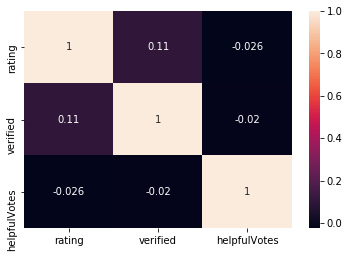

In [13]:
import seaborn as sns
sns.heatmap(dataset.corr(),annot=True)

In [14]:
import re # regular expression
import nltk # natural language tool kit
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [16]:
data1=[]

In [17]:
for i in range(0,5000):
    review = re.sub('[^a-zA-Z]', ' ', sampledata['title'][i])
    review=review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in
set(stopwords.words('english'))] 
    review = " ".join(review)
    data1.append(review)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2000)
x = cv.fit_transform(data1).toarray()


In [19]:
import pickle
pickle.dump(cv,open('cv_transform.pkl','wb'))

In [20]:
y=sampledata.iloc[:,0:1].values

In [21]:
type(x)

numpy.ndarray

In [22]:
type(y)

numpy.ndarray

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)


In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [25]:
x_train.shape

(4000, 1726)

In [26]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
C:\Users\rohit\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\rohit\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\rohit\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\rohit\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [27]:
x.shape

(5000, 1726)

In [28]:
model = Sequential()

In [29]:
model.add(Dense(units = 1726 , init = "uniform",activation = "relu"))

C:\Users\rohit\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1726, activation="relu", kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [30]:
model.add(Dense(units = 3400 , init = "uniform",activation = "relu"))

C:\Users\rohit\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=3400, activation="relu", kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [31]:
model.add(Dense(units = 1 , init = "uniform",activation = "sigmoid"))


C:\Users\rohit\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid", kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [32]:
model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [33]:
model.fit(x_train,y_train, epochs = 10, batch_size = 32)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
4000/4000 [==============================] - 21s 5ms/step - loss: 1.5945 - acc: 0.7350
Epoch 2/10
4000/4000 [==============================] - 19s 5ms/step - loss: 0.7718 - acc: 0.8067
Epoch 3/10
4000/4000 [==============================] - 20s 5ms/step - loss: 0.4284 - acc: 0.8648
Epoch 4/10
4000/4000 [==============================] - 20s 5ms/step - loss: 0.3012 - acc: 0.8900
Epoch 5/10
4000/4000 [==============================] - 20s 5ms/step - loss: 0.3130 - acc: 0.8965
Epoch 6/10
4000/4000 [==============================] - 20s 5ms/step - loss: 0.2794 - acc: 0.9027
Epoch 7/10
4000/4000 [==============================] - 20s 5ms/step - loss: 0.2535 - acc: 0.9120
Epoch 8/10
4000/4000 [==============================] - 20s 5ms/step - loss: 0.2296 - acc: 0.9177
Epoch 9/10
4000/4000 [==============================] - 21s 5ms/step - loss: 0.2536 - acc: 0.9147
Epoch 10/10
4000/400

In [34]:
model.save("Amazon.h5")

In [35]:
review

'samsung qualiti'

In [36]:
y_pred=model.predict(x_test)

In [37]:
y_pred=y_pred>0.5
y_pred

array([[ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [38]:
y_test

array([[1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
    

In [43]:
yp=model.predict(cv.transform(["Stupid phone"])) 

yp

array([[0.5633792]], dtype=float32)

In [44]:
yp=yp>0.5
yp

array([[ True]])

In [47]:
entered_input="Def not best, but not worst"
x_intent=cv.transform([entered_input])
y_pred=model.predict(x_intent)
if(y_pred>0.5):
    print("it is a positive review")
else:
    print("it is a negative review")

it is a negative review
